In [1]:
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', 80)
from shapely.geometry import Point, LineString
from geopandas import GeoDataFrame
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import datetime

In [2]:
# read in classified deeds file
rtt_classifiedRead = gpd.read_file("data/rtt_investors_classified.geojson")



In [3]:
# read in grantor classified deeds file
rtt_grantorRead = gpd.read_file("data/rtt_grantor-investors_classified.geojson")

rtt_grantorCleaned = rtt_grantorRead.filter(['objectid','grantor_inv','grantor_occ'])

rtt_classified = rtt_classifiedRead.merge(
    rtt_grantorCleaned, left_on="objectid", right_on="objectid",how="left")


rtt_classified

,id,C_DIG1,C_DIG1DESC,C_DIG2,C_DIG2DESC,C_DIG3,C_DIG3DESC,OBJECTID,Shape__Are,Shape__Len,VACBLDG,YEAR,address_high,address_low,address_low_frac,address_low_suffix,adjusted_assessed_value,adjusted_cash_consideration,adjusted_fair_market_value,adjusted_local_tax_amount,adjusted_other_consideration,adjusted_state_tax_amount,adjusted_total_consideration,assessed_value,cash_consideration,common_level_ratio,condo_name,discrepancy,display_date_x,display_date_y,document_date,document_id,document_type,elapsed,elapsed_days,fair_market_value,grantees_x_x,grantees_x_y,grantees_y,grantors_x,grantors_y,index_right,inv,investor_all,lat,legal_remarks,lng,local_tax_amount,local_tax_percent,matched_regmap,multi_invest,objectid,occ,opa_account_num,other_consideration,owner_occup,property_count,receipt_date,receipt_num,recording_date,reg_map_id,sort_year_x,sort_year_y,state_tax_amount,state_tax_percent,street_address_x,street_address_y,street_name,street_postdir,street_predir,street_suffix,total_consideration,unit_num,ward,zip_code,geometry,grantor_inv,grantor_occ
0,0,1,Residential,12,Residential Medium,121,Residential Rowhouse,280539,952.673950,165.045972,Fully Vacant,2014,NaN,3083.0,None,None,NaN,58900.0,30699.84,1767.00,NaN,589.0,58900.0,NaN,58900.0,NaN,None,no,2004-04-02T00:00:00,NaT,2004-04-02T00:00:00,50942296,DEED,999,NaN,30699.84,IRWIN LEIGHANNE,None,False,MCCAFFERTY MARIE E; TUCKER MARGARET T,None,285538,0,0.0,-75.109769,None,39.987205,1767.00,100.0,022N240033,NaN,7744699,1,251496000.0,NaN,1,1.0,2004-06-07T00:00:00,None,2004-06-07T00:00:00,022N240033,2004,NaN,589.0,100.0,3083 MEMPHIS ST,None,MEMPHIS,None,None,ST,58900.0,None,25.0,19134.0,POINT (2708216.614 249254.488),0.0,1.0
1,1,1,Residential,11,Residential Low,112,Residential SemiDetached,424189,2806.505127,278.340314,None,2012,NaN,1221.0,None,None,NaN,1.0,48599.04,NaN,NaN,NaN,1.0,NaN,1.0,NaN,None,no,2004-03-26T00:00:00,NaT,2004-03-26T00:00:00,50942298,DEED,999,NaN,48599.04,OTENG JACOB,None,False,OTENG JACOB; OTENG SHEILA READY,None,424188,0,0.0,-75.088260,None,40.020308,0.00,100.0,130N160110,NaN,7744702,1,234090400.0,NaN,1,1.0,2004-06-07T00:00:00,None,2004-06-07T00:00:00,130N160110,2004,NaN,0.0,100.0,1221 HERBERT ST,None,HERBERT,None,None,ST,1.0,None,23.0,19124.0,POINT (2713877.553 261488.875),NaN,NaN
2,2,1,Residential,11,Residential Low,112,Residential SemiDetached,530366,3395.618225,298.879760,None,2016,NaN,3631.0,None,None,NaN,92000.0,63936.00,2760.00,NaN,920.0,92000.0,NaN,92000.0,NaN,None,no,2000-05-25T00:00:00,NaT,2000-05-25T00:00:00,50092387,DEED,999,NaN,63936.00,FALLEN PAUL J III,None,False,TAYLOR COLERIDGE; TAYLOR ROBERT TR; TAYLOR RON...,None,531365,0,0.0,-74.997365,None,40.074151,2760.00,100.0,084N180294,NaN,7744935,1,661087900.0,0.0,1,1.0,2000-06-07T00:00:00,None,2000-06-07T00:00:00,084N180294,2000,NaN,920.0,100.0,3631 AVALON ST,None,AVALON,None,None,ST,92000.0,None,66.0,19114.0,POINT (2738711.806 281873.930),0.0,1.0
3,3,1,Residential,12,Residential Medium,121,Residential Rowhouse,474918,1717.321350,237.627137,None,2015,NaN,3430.0,None,None,NaN,123000.0,43066.56,3690.00,NaN,1230.0,123000.0,NaN,123000.0,NaN,None,no,2004-05-28T00:00:00,NaT,2004-05-28T00:00:00,50942514,DEED,999,NaN,43066.56,RUTA JOSEPH M,None,False,ROWLAND JAMES; ROWLAND JOAN,None,474917,0,0.0,-75.041471,None,40.038977,3690.00,100.0,137N180119,NaN,7744943,1,642110500.0,NaN,1,1.0,2004-06-08T00:00:00,None,2004-06-08T00:00:00,137N180119,2004,NaN,1230.0,100.0,3430 ALDINE ST,None,ALDINE,None,None,ST,123000.0,None,64.0,19136.0,POINT (2726767.396 268684.790),0.0,1.0
4,4,1,Residential,12,Residential Medium,121,Residential Rowhouse,472582,1555.363403,195.088770,None,2012,NaN,5809.0,None,None,NaN,93000.0,45344.64,2790.00,NaN,930.0,93000.0,NaN,93000.0,NaN,None,no,2004-05-28T00:00:00,NaT,2004-05-28T00:00:00,50942516,DEED,999,NaN,45344.64,DUFFIE JAMIE,None,False,LAVIN BETH,None,472581,0,0.0,-75.078006,None,40.028446,2790.00,100.0,139N020114,NaN,7744945,1,621440200.0,NaN,1,1.0,2004-06-08T00:00:00,None,2004-06-08T00:00:00,13

In [4]:
# Specify coordinate reference system
rtt_classified.to_crs='epsg:2272'

#rtt_classified.head()

In [5]:
city_limits = gpd.read_file("data/02_flip-investigations_data/Map_Base/PHI_City_Limits.geojson")


In [6]:
city_limits.crs 


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
PHI_city_limits = city_limits.to_crs(2272)

In [8]:
# filter for grantees
rtt_grantees = rtt_classified.loc[(rtt_classified['inv'] == 1) | (rtt_classified['occ'] == 1)] 
#rtt_investors.to_file("data/02_flip-investigations_data/rtt_investorsOnly.geojson", driver='GeoJSON')

# filter for grantors

rtt_grantors = rtt_classified.loc[(rtt_classified['grantor_inv'] == 1) | (rtt_classified['grantor_occ'] == 1)] 
#rtt_occ.to_file("data/02_flip-investigations_data/rtt_occupantsOnly.geojson", driver='GeoJSON')



rtt_grantors


,id,C_DIG1,C_DIG1DESC,C_DIG2,C_DIG2DESC,C_DIG3,C_DIG3DESC,OBJECTID,Shape__Are,Shape__Len,VACBLDG,YEAR,address_high,address_low,address_low_frac,address_low_suffix,adjusted_assessed_value,adjusted_cash_consideration,adjusted_fair_market_value,adjusted_local_tax_amount,adjusted_other_consideration,adjusted_state_tax_amount,adjusted_total_consideration,assessed_value,cash_consideration,common_level_ratio,condo_name,discrepancy,display_date_x,display_date_y,document_date,document_id,document_type,elapsed,elapsed_days,fair_market_value,grantees_x_x,grantees_x_y,grantees_y,grantors_x,grantors_y,index_right,inv,investor_all,lat,legal_remarks,lng,local_tax_amount,local_tax_percent,matched_regmap,multi_invest,objectid,occ,opa_account_num,other_consideration,owner_occup,property_count,receipt_date,receipt_num,recording_date,reg_map_id,sort_year_x,sort_year_y,state_tax_amount,state_tax_percent,street_address_x,street_address_y,street_name,street_postdir,street_predir,street_suffix,total_consideration,unit_num,ward,zip_code,geometry,grantor_inv,grantor_occ
0,0,1,Residential,12,Residential Medium,121,Residential Rowhouse,280539,952.673950,165.045972,Fully Vacant,2014,NaN,3083.0,None,None,NaN,58900.0,30699.84,1767.00,NaN,589.0,58900.0,NaN,58900.0,NaN,None,no,2004-04-02T00:00:00,NaT,2004-04-02T00:00:00,50942296,DEED,999,NaN,30699.84,IRWIN LEIGHANNE,None,False,MCCAFFERTY MARIE E; TUCKER MARGARET T,None,285538,0,0.0,-75.109769,None,39.987205,1767.00,100.0,022N240033,NaN,7744699,1,251496000.0,NaN,1,1.0,2004-06-07T00:00:00,None,2004-06-07T00:00:00,022N240033,2004,NaN,589.0,100.0,3083 MEMPHIS ST,None,MEMPHIS,None,None,ST,58900.0,None,25.0,19134.0,POINT (2708216.614 249254.488),0.0,1.0
2,2,1,Residential,11,Residential Low,112,Residential SemiDetached,530366,3395.618225,298.879760,None,2016,NaN,3631.0,None,None,NaN,92000.0,63936.00,2760.00,NaN,920.0,92000.0,NaN,92000.0,NaN,None,no,2000-05-25T00:00:00,NaT,2000-05-25T00:00:00,50092387,DEED,999,NaN,63936.00,FALLEN PAUL J III,None,False,TAYLOR COLERIDGE; TAYLOR ROBERT TR; TAYLOR RON...,None,531365,0,0.0,-74.997365,None,40.074151,2760.00,100.0,084N180294,NaN,7744935,1,661087900.0,0.0,1,1.0,2000-06-07T00:00:00,None,2000-06-07T00:00:00,084N180294,2000,NaN,920.0,100.0,3631 AVALON ST,None,AVALON,None,None,ST,92000.0,None,66.0,19114.0,POINT (2738711.806 281873.930),0.0,1.0
3,3,1,Residential,12,Residential Medium,121,Residential Rowhouse,474918,1717.321350,237.627137,None,2015,NaN,3430.0,None,None,NaN,123000.0,43066.56,3690.00,NaN,1230.0,123000.0,NaN,123000.0,NaN,None,no,2004-05-28T00:00:00,NaT,2004-05-28T00:00:00,50942514,DEED,999,NaN,43066.56,RUTA JOSEPH M,None,False,ROWLAND JAMES; ROWLAND JOAN,None,474917,0,0.0,-75.041471,None,40.038977,3690.00,100.0,137N180119,NaN,7744943,1,642110500.0,NaN,1,1.0,2004-06-08T00:00:00,None,2004-06-08T00:00:00,137N180119,2004,NaN,1230.0,100.0,3430 ALDINE ST,None,ALDINE,None,None,ST,123000.0,None,64.0,19136.0,POINT (2726767.396 268684.790),0.0,1.0
4,4,1,Residential,12,Residential Medium,121,Residential Rowhouse,472582,1555.363403,195.088770,None,2012,NaN,5809.0,None,None,NaN,93000.0,45344.64,2790.00,NaN,930.0,93000.0,NaN,93000.0,NaN,None,no,2004-05-28T00:00:00,NaT,2004-05-28T00:00:00,50942516,DEED,999,NaN,45344.64,DUFFIE JAMIE,None,False,LAVIN BETH,None,472581,0,0.0,-75.078006,None,40.028446,2790.00,100.0,139N020114,NaN,7744945,1,621440200.0,NaN,1,1.0,2004-06-08T00:00:00,None,2004-06-08T00:00:00,139N020114,2004,NaN,930.0,100.0,5809 AKRON ST,None,AKRON,None,None,ST,93000.0,None,62.0,19149.0,POINT (2716658.617 264538.633),0.0,1.0
5,5,1,Residential,11,Residential Low,111,Residential Detached,475314,6734.606567,352.840272,None,2013,NaN,1403.0,None,None,NaN,68500.0,305913.60,2055.00,NaN,685.0,68500.0,NaN,68500.0,NaN,None,no,2004-05-12T00:00:00,NaT,2004-05-12T00:00:00,50941882,DEED,999,NaN,305913.60,NVR INC,None,True,CHAMPION DEVELOPMENT CORPORATION,None,476313,1,1.0,-75.063039,SUB OF 33,40.070579,2055.00,100.0,154N130125,NaN,7744231,0,562065112.0,NaN,0,1.0,2004-06-07T00:00:00,None,

In [9]:
#GRANTEES

#CHECK DATETIME AND CLEAN
rtt_grantees['display_date_x'] = pd.to_datetime(rtt_grantees['display_date_x'])

rtt_grantees_sorted = rtt_grantees.sort_values(by=['street_address_x','display_date_x'])
grantee_resetIndex = rtt_grantees_sorted.reset_index()
grantee_cleanDF = grantee_resetIndex.filter(['id','C_DIG1DESC','C_DIG2DESC','C_DIG3DESC','OBJECTID','YEAR','VACBLDG','adjusted_cash_consideration','adjusted_total_consideration','document_id','document_type','fair_market_value','grantees_x_x','grantors_x','inv','lat','lng','matched_regmap','multi_invest','occ','owner_occup','property_count','display_date_x','recording_date','reg_map_id','sort_year_x','street_address_x','total_consideration','ward','unit_num','zip_code','geometry'])



#GROUP AND ROLLING DIFFERENCE

grantee_beg = (grantee_cleanDF.street_address_x == grantee_cleanDF.street_address_x.shift(1))                                                  
grantee_cleanDF['deedDiff2'] = (grantee_cleanDF['display_date_x'] - grantee_cleanDF['display_date_x'].shift(1))/np.timedelta64(1,'D')
grantee_cleanDF['deedDiff'] = grantee_cleanDF['deedDiff2'].where(grantee_beg,0).ffill()

#FILTER OUT DUPLICATES - filter out rows that have same address + display date


rtt_deedDiff_grantee = grantee_cleanDF.drop_duplicates(
    subset = ['street_address_x','display_date_x'],
    keep = 'last').reset_index(drop=True)


#rtt_deedDiff_grantee.to_file("data/02_flip-investigations_data/rtt_deedDiff_grantee.geojson", driver='GeoJSON')

# FILTER FOR FLIPS

#first take out 0s

grantee_no0 = rtt_deedDiff_grantee.loc[rtt_deedDiff_grantee['deedDiff'] != 0.0]
#then filter for less than 1.5 years (575 days)
rtt_Flips_grantee = grantee_no0.loc[grantee_no0['deedDiff'] <= 575]

#rtt_Flips_grantee.to_file("data/02_flip-investigations_data/rtt_Flips_grantee.geojson", driver='GeoJSON')


In [10]:
#GRANTORS

#CHECK DATETIME AND CLEAN
rtt_grantors['display_date_x'] = pd.to_datetime(rtt_grantors['display_date_x'])


rtt_grantors_sorted = rtt_grantors.sort_values(by=['street_address_x','display_date_x'])
grantors_resetIndex = rtt_grantors_sorted.reset_index()
grantors_cleanDF = grantors_resetIndex.filter(['id','C_DIG1DESC','C_DIG2DESC','C_DIG3DESC','OBJECTID','YEAR','VACBLDG','adjusted_cash_consideration','adjusted_total_consideration','document_id','document_type','fair_market_value','grantees_x_x','grantors_x','grantor_inv','lat','lng','matched_regmap','multi_invest','grantor_occ','inv','occ','owner_occup','property_count','display_date_x','recording_date','reg_map_id','sort_year_x','street_address_x','total_consideration','ward','unit_num','zip_code','geometry'])


#GROUP AND ROLLING DIFFERENCE

grantors_beg = (grantors_cleanDF.street_address_x == grantors_cleanDF.street_address_x.shift(1))                                                  
grantors_cleanDF['deedDiff2'] = (grantors_cleanDF['display_date_x'] - grantors_cleanDF['display_date_x'].shift(1))/np.timedelta64(1,'D')
grantors_cleanDF['deedDiff'] = grantors_cleanDF['deedDiff2'].where(grantors_beg,0).ffill()


#FILTER OUT DUPLICATES - filter out rows that have same address + display date
                 
rtt_deedDiff_grantors = grantors_cleanDF.drop_duplicates(
    subset = ['street_address_x','display_date_x'],
    keep = 'last').reset_index(drop=True)

#rtt_deedDiff_grantors.to_file("data/02_flip-investigations_data/rtt_deedDiff_grantors.geojson", driver='GeoJSON')

# FILTER FOR FLIPS 

#first take out 0s

grantors_no0 = rtt_deedDiff_grantors.loc[rtt_deedDiff_grantors['deedDiff'] != 0.0]
#then filter for less than 1.5 years (575 days)
rtt_Flips_grantors = grantors_no0.loc[grantors_no0['deedDiff'] <= 575]


#rtt_Flips_grantors.to_file("data/02_flip-investigations_data/rtt_Flips_grantors.geojson", driver='GeoJSON')

#rtt_Flips_grantors.head(20)[['deedDiff','display_date_x','grantors_x','grantees_x_x','street_address_x']]
#rtt_Flips_grantors





/Users/adamvosburgh/opt/anaconda3/envs/geo-2021/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [11]:
rtt_Flips_grantors.size


2142216

In [12]:
rtt_Flips_grantors_inv = rtt_Flips_grantors.loc[rtt_Flips_grantors['grantor_inv']==1]
rtt_Flips_grantors_occ = rtt_Flips_grantors.loc[rtt_Flips_grantors['grantor_occ']==1]
rtt_Flips_grantors_invToOcc = rtt_Flips_grantors.loc[~(rtt_Flips_grantors['grantor_inv']==1) & (rtt_Flips_grantors['occ']==1)]


#rtt_Flips_grantors_inv.to_file("data/02_flip-investigations_data/rtt_Flips_grantors_inv.geojson", driver='GeoJSON')
#rtt_Flips_grantors_invToOcc.to_file("data/02_flip-investigations_data/rtt_Flips_grantors_invToOcc.geojson", driver='GeoJSON')
                                                     
rtt_Flips_grantors_inv.head(20)[['deedDiff','display_date_x','grantors_x','grantees_x_x','street_address_x']]                                                
                                                
#rtt_owner_check = rtt_investors.loc[rtt_investors['owner_occup'] == 1] 

,deedDiff,display_date_x,grantors_x,grantees_x_x,street_address_x
46,31.0,2010-07-13,NATIONAL RESIDENTIAL NOMINEE SERVICES INC,KIM WON M,1 CHRISTIAN ST UNIT 37U
126,356.0,2018-04-30,GREENVALE DEVELOPMENT LLC,ISSEL ERIK M,1 WISSAHICKON LN
137,237.0,2004-01-13,BUILDER ONE INC,MCFILLIN TARA L,10 CATHARINE ST
156,85.0,2010-01-08,SEATON GROUP LLC,GONZALEZ YVONNE,10 E SILVER ST
203,265.0,2010-06-15,100 ALNUS PLACE LLC,PSILLOS ACHILLEAS; PSILLOS ANNA IRENE,100 ALNUS PL
205,567.0,2002-08-20,MERIDIAN PROPERTY GROUP LLC,SPALLETTA CARMEN,100 APSLEY ST
240,26.0,2005-12-27,CASH CONSTRUCTION INC,SMITH FRANCIS X,100 MCKEAN ST
289,5.0,2007-06-18,CARTUS FINANCIAL CORPORATION,LUTZKER GREG M; LUTZKER HEATHER,100 PARKER AVE UNIT 22
353,31.0,2018-03-27,WEICHERT WORKFORCE MOBILITY INC,TALOTTA GIUSEPPE,100 PARKER AVE UNIT 49
416,549.0,2020-04-09,TOBEN BROTHERS LLC,BRADLEY KARTINA MARIE; HILLIER KRISTIN CATHERINE,100 W MOUNT AIRY AVE


<AxesSubplot:>

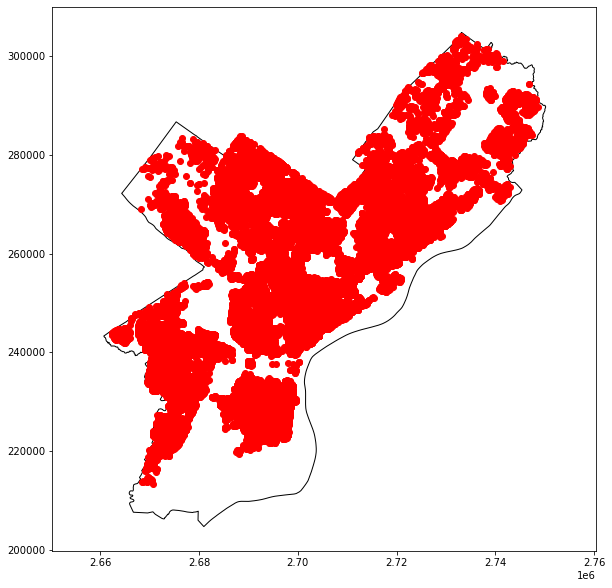

In [13]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_box_aspect(aspect=1)

PHI_city_limits.plot(ax=ax, color='white', edgecolor='black')


#rtt_classified.plot(ax=ax, color='blue')

#rtt_investors.plot(ax=ax, color = 'blue')
#rtt_Flips_grantee.plot(ax=ax, color = 'purple')


rtt_Flips_grantors.plot(ax=ax, color = 'red')




In [14]:
# All grantors plot
#total_bar = total.reset_index()
#f, (ax1) = plt.subplots(1,1,figsize=(40, 10))
#sns.set(style="white")

#plt.plot(rtt_Flips_grantors['sort_year_x'], marker='o', color = 'black')
#plt.plot(total_bar['year'],total_bar['investor_all'], marker='o', color = 'black')
#plt.plot(total_bar['year'],total_bar['inv'], marker='o', color = 'black')

<BarContainer object of 59506 artists>

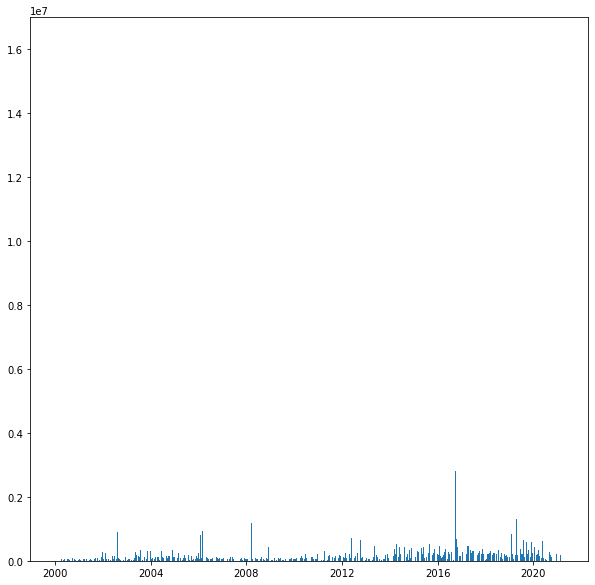

In [15]:
#Grantor investor bar graph

f, (ax1) = plt.subplots(1,1,figsize=(10, 10))
# sns.set(style="white")

plt.bar(rtt_Flips_grantors['display_date_x'],rtt_Flips_grantors['fair_market_value'])

#plt.scatter(rtt_Flips_grantors['display_date_x'],rtt_Flips_grantors['fair_market_value'])


In [16]:
# Calculations

print(rtt_Flips_grantors.size/rtt_classified.size)
print(rtt_Flips_grantors_inv.size/rtt_Flips_grantors.size)
print(rtt_Flips_grantors_invToOcc.size/rtt_Flips_grantors_inv.size)

0.03987187788330041
0.42350351225086547
1.18138169120273


(array([ 3427.,  6603., 10484.,  8357.,  4711.,  4054.,  4200.,  5495.,
         6624.,  5551.]),
 array([10967. , 11741.3, 12515.6, 13289.9, 14064.2, 14838.5, 15612.8,
        16387.1, 17161.4, 17935.7, 18710. ]),
 <BarContainer object of 10 artists>)

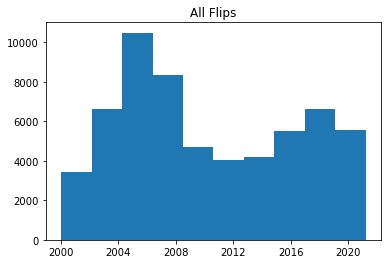

In [17]:
# All Flips Histogram
plt.title(label="All Flips")
plt.hist(rtt_Flips_grantors['display_date_x'])


#plt.savefig("data/02_flip-investigations_data/Hist_All-Flips.png")


(array([[7.43683254e-05, 1.43289773e-04, 2.27900833e-04, 1.80962202e-04,
         1.02232034e-04, 8.79746691e-05, 9.11429725e-05, 1.19440695e-04,
         1.43593583e-04, 1.20417227e-04],
        [8.36221930e-05, 1.56523917e-04, 2.27119346e-04, 1.85872151e-04,
         1.10245958e-04, 9.23151501e-05, 9.78021041e-05, 1.12691644e-04,
         1.26288646e-04, 9.88412040e-05]]),
 array([10967. , 11741.4, 12515.8, 13290.2, 14064.6, 14839. , 15613.4,
        16387.8, 17162.2, 17936.6, 18711. ]),
 <a list of 2 BarContainer objects>)

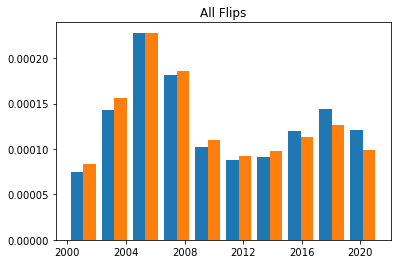

In [18]:
# All Flips (grantor vs. grantee) Histogram
plt.title(label="All Flips")
plt.hist([rtt_Flips_grantors['display_date_x'],rtt_Flips_grantee['display_date_x']],stacked=False, density=True)


#plt.savefig("data/02_flip-investigations_data/Hist_All-Flips_grantorxgrantee.png")

(array([1200., 1912., 3025., 2678., 1906., 1950., 2129., 2913., 3860.,
        3628.]),
 array([10976. , 11748.1, 12520.2, 13292.3, 14064.4, 14836.5, 15608.6,
        16380.7, 17152.8, 17924.9, 18697. ]),
 <BarContainer object of 10 artists>)

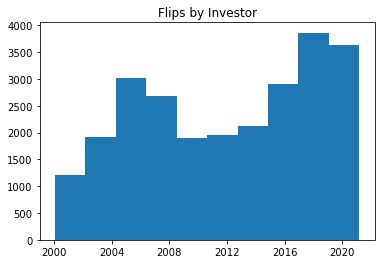

In [19]:
# Investor Flips Histogram
plt.title(label="Flips by Investor")
plt.hist(rtt_Flips_grantors_inv['display_date_x'])


#plt.savefig("data/02_flip-investigations_data/Hist_Inv-Flips.png")

(array([2251., 4678., 7463., 5664., 2796., 2094., 2080., 2560., 2742.,
        1977.]),
 array([10967. , 11741.3, 12515.6, 13289.9, 14064.2, 14838.5, 15612.8,
        16387.1, 17161.4, 17935.7, 18710. ]),
 <BarContainer object of 10 artists>)

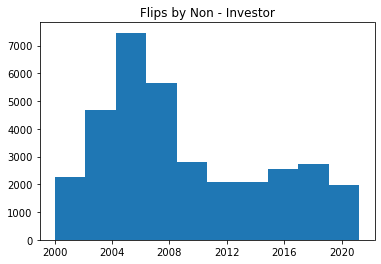

In [20]:
# NON - Investor Flips Histogram
plt.title(label="Flips by Non - Investor")
plt.hist(rtt_Flips_grantors_occ['display_date_x'])


#plt.savefig("data/02_flip-investigations_data/Hist_Occ-Flips.png")

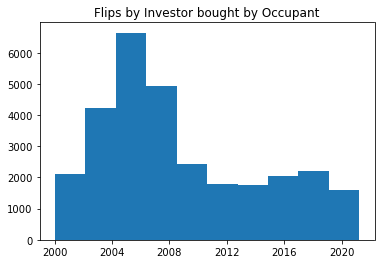

In [21]:
# Investor to Occupant Flips Histogram
plt.title(label="Flips by Investor bought by Occupant")
plt.hist(rtt_Flips_grantors_invToOcc['display_date_x'])


plt.savefig("data/02_flip-investigations_data/Hist_InvToOcc-Flips.png")

(array([[6.02670992e-05, 9.86515016e-05, 1.54818798e-04, 1.38009607e-04,
         9.81390263e-05, 1.00445165e-04, 1.08644771e-04, 1.50411510e-04,
         1.98942924e-04, 1.83158684e-04],
        [8.47439713e-05, 1.76113859e-04, 2.80961465e-04, 2.13234053e-04,
         1.05261725e-04, 7.88333522e-05, 7.83062907e-05, 9.63769731e-05,
         1.03228774e-04, 7.44286234e-05]]),
 array([10967. , 11741.3, 12515.6, 13289.9, 14064.2, 14838.5, 15612.8,
        16387.1, 17161.4, 17935.7, 18710. ]),
 <a list of 2 BarContainer objects>)

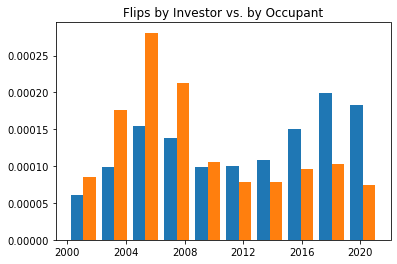

In [22]:
# Investor vs. Investor to Occupant Flips Histogram
plt.title(label="Flips by Investor vs. by Occupant")
plt.hist([rtt_Flips_grantors_inv['display_date_x'],rtt_Flips_grantors_occ['display_date_x']], stacked=False, density=True)


#plt.savefig("data/02_flip-investigations_data/Hist_Inv+Occ-Flips.png")


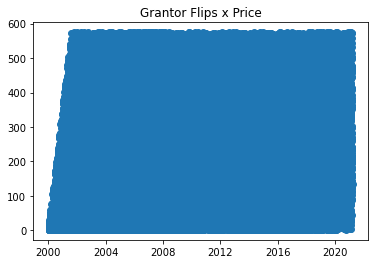

In [23]:
# Grantor Flips Scatter

plt.title(label="Grantor Flips x Price")
plt.scatter(rtt_Flips_grantors['display_date_x'],rtt_Flips_grantors['deedDiff'])
#plt.savefig("data/02_flip-investigations_data/Scat_Owner-Flips.png")





UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

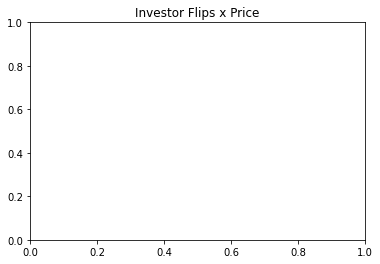

In [24]:
#grantor Flips Violin Plot


plt.title(label="Investor Flips x Price")
plt.violinplot(rtt_Flips_grantors['display_date_x'],rtt_Flips_grantors['deedDiff'])



In [ ]:
#rtt_deedDiff_grantee.head(30)[['deedDiff','display_date_x','street_address_x']]

#rtt_Flips_grantors.head(10)[['deedDiff','display_date_x','grantors_x','grantees_x_x','street_address_x']]

check_all = rtt_classified.loc[(rtt_classified['street_address_x'] == '1000 S COLORADO ST')]

check_all['display_date_x'] = pd.to_datetime(check_all['display_date_x'])
check_all_sorted = check_all.sort_values(by=['street_address_x','display_date_x'])

check_all_sorted.head(20)[['display_date_x','grantors_x','grantees_x_x','street_address_x']]




In [ ]:
#check_deedDiff = grantors_cleanDF.loc[(grantors_cleanDF['street_address_x'] == '1000 S COLORADO ST')]


check_deedDiff = rtt_deedDiff_grantors.loc[(rtt_deedDiff_grantors['street_address_x'] == '1000 S COLORADO ST')]





check_deedDiff.head(20)[['deedDiff','display_date_x','grantors_x','grantees_x_x','street_address_x']]

In [ ]:
check_Flips = rtt_Flips_grantors.loc[(rtt_Flips_grantors['street_address_x'] == '1000 S COLORADO ST')]


check_Flips.head(50)[['deedDiff','display_date_x','grantors_x','grantees_x_x','street_address_x']]


In [ ]:
#GRAVEYARD

# check for owner_occ - check is good
#rtt_owner_check = rtt_investors.loc[rtt_investors['owner_occup'] == 1] 
#rtt_owner_check.shape

#_grouped = df.groupby("street_address_x").rolling(window=1).Amount.count()

#rtt_investors_dateindex['flip_time'] = rtt_investors_dateindex.groupby(['street_address_x']).document_date.astype('timedelta64[D]')

#cleanDF['deedDiff'] = cleanDF.groupby(['street_address_x','receipt_date']).receipt_date.apply(lambda x: x - x.iloc[0])
#cleanDF['deedDiff'] /= np.timedelta64 (1, 'D')

#grantors_cleanDF['deedDiff'] = grantors_cleanDF.groupby(['street_address_x','display_date_x']).display_date_x.apply(lambda x: x - x.iloc[0])
#grantors_cleanDF['deedDiff'] /= np.timedelta64 (1, 'D')


#grantors_cleanDF['deedDiff'] = (grantors_cleanDF['display_date_x'] - grantors_cleanDF['display_date_x'].where(grantors_beg).ffill())/np.timedelta64(1,'D')

#grantors_cleanDF['deedDiff']

#grantors_cleanDF['deedDiff'] = grantors_cleanDF.groupby(['display_date_x']).display_date_x.apply(lambda x: x - x.iloc[0]).apply(lambda x:x / np.timedelta64(1, 'D'))
#grantors_cleanDF['deedDiff'] = grantors_cleanDF.groupby('street_address_x')['display_date_x'].diff().fillna(pd.Timedelta(seconds=0))




#rtt_investors.crs = 'epsg:4326'
#PHI_rtt_investors = rtt_investors.to_crs('epsg:2272')

#OCCUPANTS

'''  # FILTER FOR ADDRESS / ZIP THAT APPEARS MOST TIMES

topzip = rtt_classified['zip_code'].value_counts() 
topaddress = rtt_classified['street_address_x'].value_counts() 

#topaddress.head(10)
#rtt_investors_topaddress.to_file("data/rtt_investors_topaddress.geojson", driver ='GeoJSON')

topaddress_1000 = topaddress.iloc[:1000]
addresses=topaddress_1000.index
a_list=list(addresses)
#list2 = ['12 HAMILTON CIR,' '3817 POPLAR ST']

#is_top = rtt_test['street_address_x'].isin(a_list)
is_top = rtt_classified['street_address_x'] == '12 HAMILTON CIR'
#is_top = rtt_test['zip_code'] == 19134
rtt_top = rtt_classified[is_top]
#rtt_top['property_count'].mean()
rtt_top['receipt_date'] = pd.to_datetime(rtt_top.receipt_date)
rtt_top.sort_values(by=['receipt_date'])
rtt_top.shape



#rtt_top.to_html('temp.html') '''

'''
#CHECK DATETIME AND CLEAN
rtt_occ['receipt_date'] = pd.to_datetime(rtt_occ['receipt_date'])

rtt_occ_sorted = rtt_occ.sort_values(by=['street_address_x','receipt_date'])
occ_resetIndex = rtt_occ_sorted.reset_index()
occ_cleanDF = occ_resetIndex.filter(['id','C_DIG1DESC','C_DIG2DESC','C_DIG3DESC','OBJECTID','YEAR','VACBLDG','adjusted_cash_consideration','adjusted_total_consideration','display_date_x','document_date','document_id','document_type','fair_market_value','grantees_x_x','grantors_x','inv','lat','lng','matched_regmap','multi_invest','occ','owner_occup','property_count','receipt_date','recording_date','reg_map_id','sort_year_x','street_address_x','total_consideration','ward','unit_num','zip_code','geometry'])


#GROUP AND ROLLING DIFFERENCE


occ_beg = (occ_cleanDF.street_address_x != occ_cleanDF.street_address_x.shift(1)) 
occ_cleanDF['deedDiff'] = (occ_cleanDF['receipt_date'] - occ_cleanDF['receipt_date'].where(occ_beg).ffill())/np.timedelta64(1,'D')
rtt_deedDiff_occ = occ_cleanDF

#rtt_deedDiff_occ.to_file("data/02_flip-investigations_data/rtt_deedDiff_occ.geojson", driver='GeoJSON')

# FILTER FOR FLIPS

#first take out 0s
occ_no0 = rtt_deedDiff_occ.loc[rtt_deedDiff_occ['deedDiff'] != 0.0]
#then filter for less than 1.5 years (575 days)
rtt_Flips_occ = occ_no0.loc[occ_no0['deedDiff'] <= 575]

#rtt_Flips_occ.to_file("data/02_flip-investigations_data/rtt_Flips_occ.geojson", driver='GeoJSON')
'''

